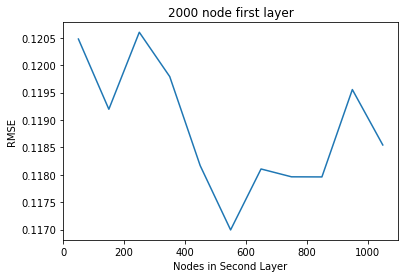

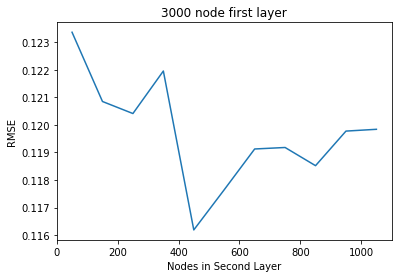

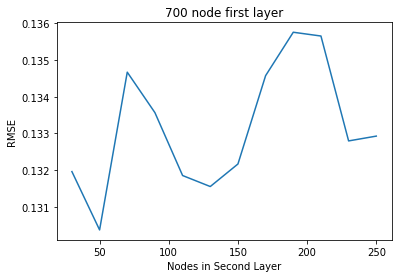

In [15]:
import matplotlib.pyplot as plt

l = np.arange(30,251,20)
r = [0.131961, .130372, 0.13467, .133567, .131854, .131554, .132168, .134575, .135758, .135655, .132797, .132928]

a = np.arange(50,1051,100)
b = [.120476,.119195,.120600,.119791,.118167,.116993,.118105,.117962,.117960,.119554,.118543]
c = [.123360,.120847,.120410,.121953,.116187,.117645,.119124,.119178,.118518,.119773,.119838]
plt.plot(a,b)
plt.title("2000 node first layer")
plt.ylabel("RMSE")
plt.xlabel("Nodes in Second Layer")
plt.figure()
plt.plot(a,c)
plt.title("3000 node first layer")
plt.ylabel("RMSE")
plt.xlabel("Nodes in Second Layer")
plt.figure()
plt.plot(l,r)
plt.title("700 node first layer")
plt.ylabel("RMSE")
plt.xlabel("Nodes in Second Layer")
plt.show()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
import sklearn.model_selection as ms
from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import Descriptors as de
import itertools

ModuleNotFoundError: No module named 'rdkit'

In [ ]:
"""
Read in train and test as Pandas DataFrames
"""
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [ ]:
df_train.head()

In [4]:
df_test.head()

,Id,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,...,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256
0,1,c1sc(-c2cnc3c(c2)c2nsnc2c2cc4cccnc4cc32)c2cc[n...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,[nH]1cccc1-c1cc2c3nsnc3c3c4sccc4[nH]c3c2s1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,[nH]1c2cc(-c3ccc[se]3)c3nsnc3c2c2c3cscc3c3ccc4...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,[nH]1c(cc2cnc3c(c12)c1=C[SiH2]C=c1c1ccc2=CCC=c...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,c1sc(-c2sc(-c3sc(-c4scc5[se]ccc45)c4ccoc34)c3c...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_train = df_train.sample(n=10000)

In [6]:
# test_train = df_train.sample(n=1000)


In [7]:
# """
# Example Feature Engineering

# this calculates the length of each smile string and adds a feature column with those lengths
# Note: this is NOT a good feature and will result in a lower score!
# """
# #smiles_len = np.vstack(df_all.smiles.astype(str).apply(lambda x: len(x)))
# #df_all['smiles_len'] = pd.DataFrame(smiles_len)
# convert_to_mol = np.vectorize(Chem.MolFromSmiles)

# def get_descriptors(mol):
#     return [de.ExactMolWt(mol), de.HeavyAtomCount(mol), de.HeavyAtomMolWt(mol), de.NHOHCount(mol), de.NOCount(mol), de.NumHAcceptors(mol), de.NumHDonors(mol), de.NumHeteroatoms(mol), de.NumRotatableBonds(mol), de.NumValenceElectrons(mol)]

# def convert_fp(smile):
#     m = Chem.MolFromSmiles(smile)
#     # http://www.rdkit.org/docs/GettingStartedInPython.html#fingerprinting-and-molecular-similarity
#     return AllChem.GetMorganFingerprintAsBitVect(m,2,nBits=512)

# getBitVector = lambda x: x.ToBitString()
# getBitVector = np.vectorize(getBitVector)

# mols = pd.DataFrame(test_train['smiles'].apply(Chem.MolFromSmiles))
# descriptors = mols['smiles'].apply(get_descriptors)
# df = pd.DataFrame(descriptors).rename(index=str, columns={"smiles": "descriptors"})
# splitted = df['descriptors'].apply(lambda x: pd.Series(list((x))))
# splitted = splitted.rename(index=str, columns={0: "ExactMolWt", 1:"HeavyAtomCount", 2:"HeavyAtomMolWt", 3:"NHOHCount", 4:"NOCount", 5:"NumHAcceptors", 6:"NumHDonors", 7: "NumHeteroatoms", 8: "NumRotatableBonds", 9: "NumValenceElectrons" })
# splitted.index = test_train.index
# test_train = pd.concat([test_train, splitted], axis = 1)
# # test_train.fillna(0, inplace = True)

# # test_train = df_train.drop(['smiles'], axis=1)
# # # split training set into validation set to check rmse
# # X_train, X_validate, y_train, y_validate = ms.train_test_split(test_train, Y_train, test_size=0.2)

In [8]:
# print(test_train)
# splitted.dropna(axis = 0,how = "any", inplace = True)
# test_train.dropna(axis = 0,how = "any", inplace = True)
# print(splitted.shape)
# print(test_train.shape)

In [9]:
%%capture
#store gap values
Y_train = df_train.gap.values
#row where testing examples start
test_idx = df_train.shape[0]
#delete 'Id' column
df_test = df_test.drop(['Id'], axis=1)
#delete 'gap' column

df_train = df_train.drop(['gap'], axis=1)
# code from docs about fingerprinting


In [10]:
"""
Example Feature Engineering

this calculates the length of each smile string and adds a feature column with those lengths
Note: this is NOT a good feature and will result in a lower score!
"""
#smiles_len = np.vstack(df_all.smiles.astype(str).apply(lambda x: len(x)))
#df_all['smiles_len'] = pd.DataFrame(smiles_len)
def convert_fp(m):
    # http://www.rdkit.org/docs/GettingStartedInPython.html#fingerprinting-and-molecular-similarity
    return AllChem.GetMorganFingerprintAsBitVect(m,2,nBits=2048)

def get_descriptors(mol):
    return [de.ExactMolWt(mol), de.HeavyAtomCount(mol), de.HeavyAtomMolWt(mol), de.NHOHCount(mol), de.NOCount(mol), de.NumHAcceptors(mol), de.NumHDonors(mol), de.NumHeteroatoms(mol), de.NumRotatableBonds(mol), de.NumValenceElectrons(mol)]

getBitVector = lambda x: x.ToBitString()


mols = pd.DataFrame(df_train['smiles'].apply(Chem.MolFromSmiles))

fingerprints = mols['smiles'].apply(convert_fp)
df = pd.DataFrame(fingerprints).rename(index=str, columns={"smiles": "fp"})
splitted = df['fp'].apply(lambda x: pd.Series(list((x))))
splitted.index = df_train.index
df_train = pd.concat([df_train, splitted], axis = 1)

# descriptors = mols['smiles'].apply(get_descriptors)
# df = pd.DataFrame(descriptors).rename(index=str, columns={"smiles": "descriptors"})
# splitted = df['descriptors'].apply(lambda x: pd.Series(list((x))))
# splitted = splitted.rename(index=str, columns={0: "ExactMolWt", 1:"HeavyAtomCount", 2:"HeavyAtomMolWt", 3:"NHOHCount", 4:"NOCount", 5:"NumHAcceptors", 6:"NumHDonors", 7: "NumHeteroatoms", 8: "NumRotatableBonds", 9: "NumValenceElectrons" })
# splitted.index = df_train.index
# df_train = pd.concat([df_train, splitted], axis = 1)



df_train = df_train.drop(['smiles'], axis=1)
# split training set into validation set to check rmse
X_train, X_validate, y_train, y_validate = ms.train_test_split(df_train, Y_train, test_size=0.2)

In [11]:
# # #Drop the 'smiles' column
# df_all = df_all.drop(['smiles'], axis=1)
# vals = df_all.values
# X_train = vals[:test_idx]
# X_test = vals[test_idx:]


# # print "Train features:", X_train.shape
# # print "Train gap:", Y_train.shape
# # print "Test features:", X_test.shape
# X_train.head()

In [12]:
def rmse(predictions, actual):
    return (np.sum((predictions - actual)**2) / len(predictions))**.5

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_validate)

In [ ]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_validate)

In [ ]:
for i in np.arange(30, 1200, 20):
    MLP = MLPRegressor(hidden_layer_sizes=(i))
    MLP.fit(X_train, y_train)
    MLP_pred = MLP.predict(X_validate)
    print ("layer size: %d" % i)
    print ("RMSE: %f" % rmse(MLP_pred, y_validate))


In [13]:
MLP = MLPRegressor(hidden_layer_sizes=(2000,700))
MLP.fit(X_train, y_train)
MLP_pred = MLP.predict(X_validate)

In [ ]:
clf = BayesianRidge(compute_score=True)
clf.fit(X_train, y_train)
ridge_pred = clf.predict(X_validate)

In [ ]:
print(rmse(LR_pred, y_validate))
print(rmse(RF_pred, y_validate))
print(rmse(MLP_pred, y_validate))
print(rmse(ridge_pred, y_validate))


In [ ]:
def meanboost(pred_array):
    min_rmse = float('inf')
    for i in range(1, len(pred_array) + 1):
        for comb in itertools.combinations(pred_array, i):
            sum_rmse = np.zeros(len(pred_array[0]))
            for predictor in comb:
                sum_rmse = sum_rmse + predictor
            sum_rmse = sum_rmse / i
            sum_rmse = rmse(sum_rmse, y_validate)
            if sum_rmse < min_rmse:
                min_rmse = sum_rmse
    return min_rmse

meanboost([LR_pred,ridge_pred, RF_pred, MLP_pred])

In [14]:
ADR = AdaBoostRegressor(base_estimator=MLP)
ADR.fit(X_train, y_train)
ADR_pred = ADR.predict(X_validate)
print(rmse(ADR_pred, y_validate))

0.119269794946


In [ ]:
MLP = MLPRegressor(hidden_layer_sizes=(2000,700))
MLP.fit(df_train, Y_train)

In [ ]:
MLP_pred = np.zeros((len(df_test)))
for i in np.arange(0, len(df_test) + 1, 10000):
    fingerprints = getBitVector(pd.DataFrame(df_test[i:i + 10000]['smiles'].apply(convert_fp))['smiles'].values)
    df = pd.DataFrame(fingerprints, columns = ['fp'])
    splitted = df['fp'].apply(lambda x: pd.Series(list((x))))
    splitted.index = df_test[i:i + len(df)].index
    df_test_step = pd.concat([df_test[i:i + len(df)], splitted], axis = 1)
    df_test_step.fillna(0, inplace = True)
    df_test_step = df_test_step.drop(['smiles'], axis=1)
    MLP_pred_step = MLP.predict(df_test_step)
    MLP_pred[i:i + len(MLP_pred_step)] = MLP_pred_step
    print (i + 10000)

In [ ]:
def write_to_file(filename, predictions):
    with open(filename, "w") as f:
        f.write("Id,Prediction\n")
        for i,p in enumerate(predictions):
            f.write(str(i+1) + "," + str(p) + "\n")

In [ ]:
# write_to_file("sample1.csv", LR_pred)
write_to_file("pred.csv", MLP_pred)